/Users/zhangxijing/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


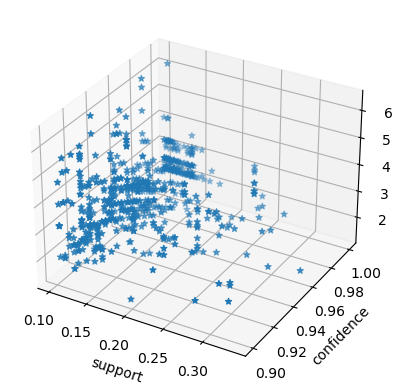

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth,apriori,association_rules


#Input Dateset
# org_df = pd.read_csv("amr_horse_ds.csv")
org_df = pd.read_csv("/Users/zhangxijing/MasterNEU/INFO6105DataScienceEngineeringMethodsandTools/Dataset/amr_horse_ds.csv")
org_df= pd.get_dummies(org_df.loc[:,org_df.columns!='Age'])

#Extract Association Rules
frequent_patterns_df = fpgrowth(org_df, min_support=0.1,use_colnames=True)
rules_df = association_rules(frequent_patterns_df, metric = "confidence", min_threshold = 0.9)
high_lift_rules_df = rules_df[rules_df['lift'] > 1.5]

#Save Association Rules
high_lift_rules_df.to_csv('arules.csv')

#Visualize Association Rules
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(rules_df['support'], rules_df['confidence'], rules_df['lift'], marker="*")
ax.set_xlabel('support')
ax.set_ylabel('confidence')
ax.set_zlabel('lift')
plt.show()